In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

def add_bar_labels(ax):
    #ax = plt.gca()
    for i in ax.patches:
        ax.text(i.get_x() + i.get_width() / 2., i.get_height(), 
                '%d' % int(i.get_height()), fontsize=10, 
                ha="center", va='bottom')

In [2]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [4]:
df.shape

(177866, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [6]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [7]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [10]:
sum(df.duplicated())

0

In [11]:
df['Model Year'].unique()

array([2020, 2023, 2019, 2016, 2021, 2017, 2013, 2018, 2015, 2022, 2014,
       2012, 2024, 2011, 2000, 2008, 2010, 2002, 1998, 1999, 1997, 2003],
      dtype=int64)

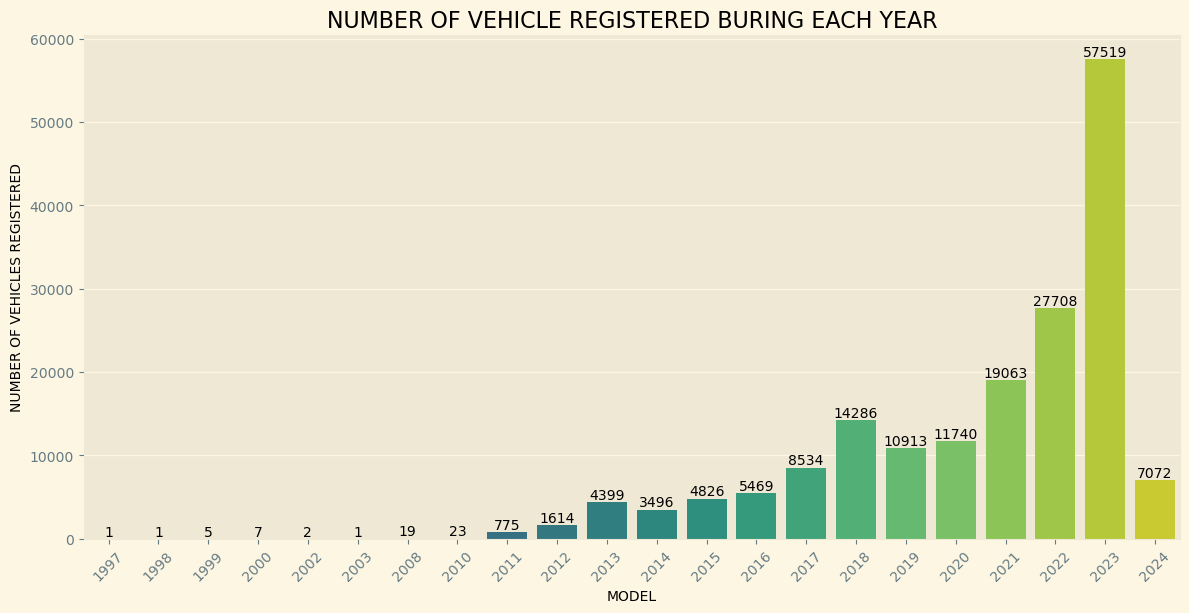

In [12]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Model Year', palette='viridis')
plt.xticks(rotation = 45)
ax = plt.gca()
plt.xlabel("MODEL")
plt.ylabel("NUMBER OF VEHICLES REGISTERED")
add_bar_labels(ax)
plt.tight_layout()
plt.title("NUMBER OF VEHICLE REGISTERED BURING EACH YEAR")
plt.show()

#### CONCLUSION :-
    From the above bar chart, we can see that the EV adoption rate has been increasing rapidly since 2015 or 2016. As the growth is steady till 2014, but after that, it is rapidly growing, and in 2023, this bar has almost double.

                                                                        
 ## <span style="color: purple;">NOW WE WILL ANALYZE COUNTRY WISE :- K (Potassium)</span>


In [13]:
df['County'].unique()

array(['King', 'Snohomish', 'Kitsap', 'Thurston', 'Yakima', 'Island',
       'Chelan', 'Skagit', 'Spokane', 'Walla Walla', 'Grant', 'Stevens',
       'Whitman', 'Kittitas', 'Pend Oreille', 'Clark', 'Cowlitz',
       'Jefferson', 'Clallam', 'Klickitat', 'Pierce', 'Grays Harbor',
       'Whatcom', 'Skamania', 'Wahkiakum', 'Benton', 'Franklin', 'Lewis',
       'San Juan', 'Mason', 'Okanogan', 'Douglas', 'Adams', 'Pacific',
       'Asotin', 'Columbia', 'Lincoln', 'Ferry', 'Garfield'], dtype=object)

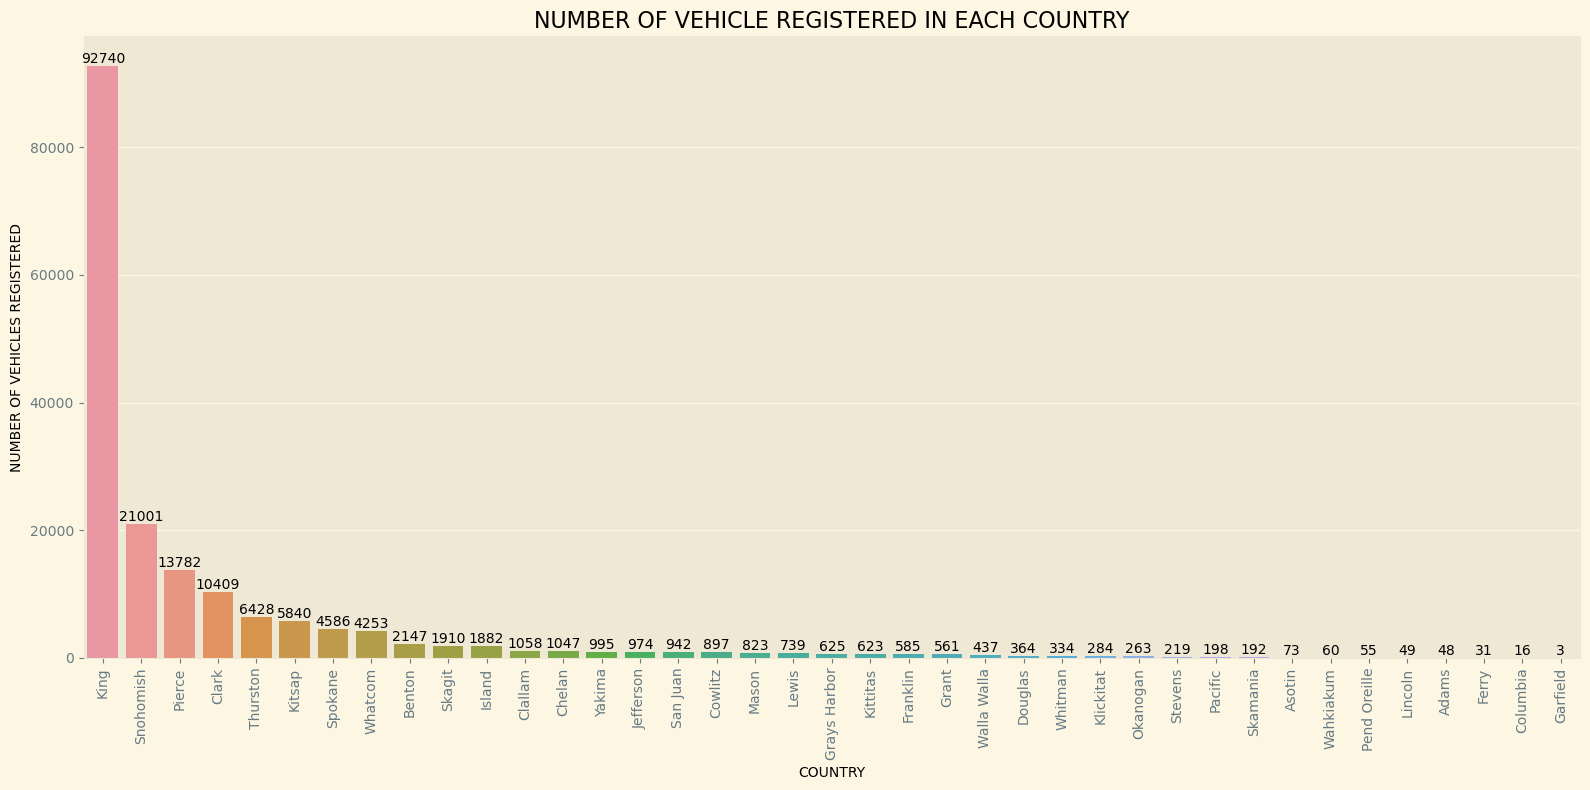

In [14]:
plt.figure(figsize=(16,8))

sns.countplot(data=df, x='County', order=df['County'].value_counts().index)
plt.xticks(rotation = 90)
ax = plt.gca()
add_bar_labels(ax)
plt.xlabel("COUNTRY")
plt.ylabel("NUMBER OF VEHICLES REGISTERED")
plt.title("NUMBER OF VEHICLE REGISTERED IN EACH COUNTRY")

plt.tight_layout()
plt.show()

In [15]:
df_top3_country = df[(df['County']=='King') | (df['County'] == 'Snohomish') | (df['County'] == 'Pierce')]

In [16]:
#ldf_top3_country['City'].head(10)

df_top3_country_city = df_top3_country.groupby(['County','City']).size().sort_values(ascending = False).reset_index(name = 'Number of registration')
df_top3_country_city.head(10)
top_cities = df_top3_country_city.head(10)

In [17]:
top_cities

,County,City,Number of registration
0,King,Seattle,29447
1,King,Bellevue,8930
2,King,Redmond,6478
3,King,Kirkland,5362
4,King,Sammamish,5280
5,King,Renton,4980
6,Snohomish,Bothell,4663
7,Pierce,Tacoma,3722
8,King,Tukwila,2927
9,King,Kent,2782


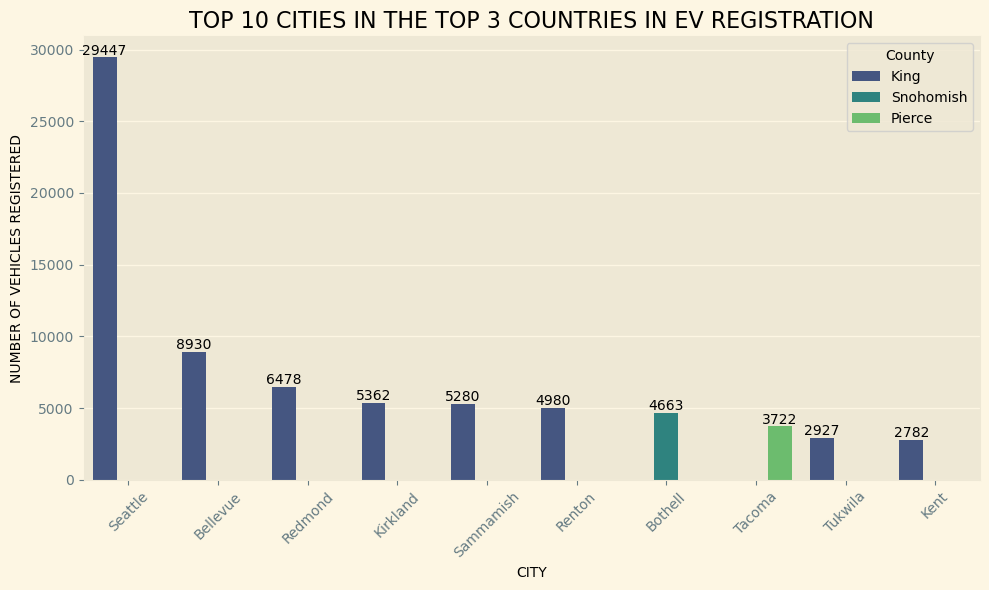

In [20]:

plt.figure(figsize=(10, 6))
ax = sns.barplot(y='Number of registration', x='City', hue='County', data=top_cities, palette="viridis")

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('TOP 10 CITIES IN THE TOP 3 COUNTRIES IN EV REGISTRATION')
plt.ylabel('NUMBER OF VEHICLES REGISTERED')
plt.xlabel('CITY')
plt.legend(title='County')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### conclusion:-
    With the help of these visual we tried to visualise top 10 cities in the top three countries in terms of electrical vehicles.

    top 3 countries are ['king', 'Snohomish', 'pierce']
    top 10 cities :-
                        king            = ['Seattle', 'Bellevue', 'Redmond', 'Kirkland', 'Sammamish', 'Renton', 'Tukwila', 'Kent']
                        Snohomish = ['Bothell']
                        Pierce         = ['Tacoma']
                
    From this we get to know that,
        - City Seattle has the most EV registrations which is almost three times more than any other city.
        - city Bellevue has the second-highest number of registrations.
        - cities like Redmond, Kirkland, Sammamish, and Renton have a moderate number of registration.
        - cities Tukwila and kent has the lowest number of registration amount top 10 which belong to country king.
        - City Bothell has the most number of registration in the country, Snohomish, but its rank 7 amoung top 10 cities.
        - City Tacoma has the most number of registration in the country, Pierce, but its rank 8 amoung top 10 cities.


                                                                        
 ## <span style="color: purple;">NOW, LETS ANALYSE TYPE OF ELECTRIC VEHICLE</span>


In [21]:
df['Electric Vehicle Type'].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

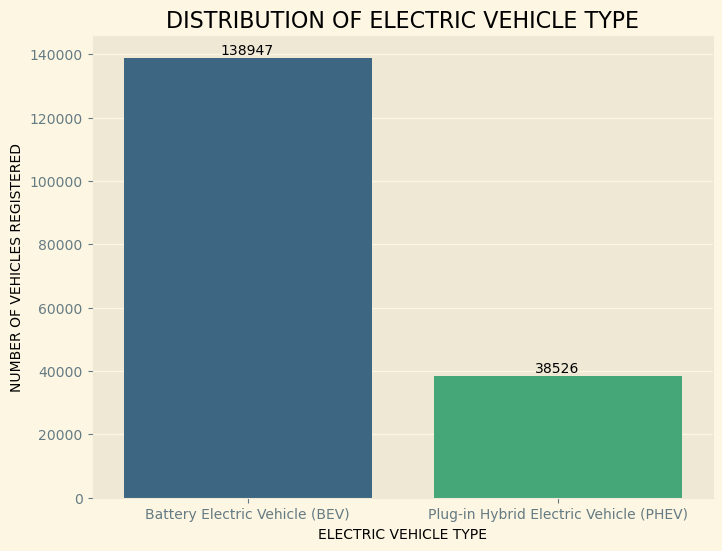

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Electric Vehicle Type', palette='viridis')
plt.xlabel("ELECTRIC VEHICLE TYPE")
plt.ylabel("NUMBER OF VEHICLES REGISTERED")
plt.title("DISTRIBUTION OF ELECTRIC VEHICLE TYPE")
ax = plt.gca()
add_bar_labels(ax)
plt.show()

##### CONCLUSION:-
    From this, we can get that people usually prefer battery-electric vehicles over plug-in hybrid electric vehicles.

                                                                        
 ## <span style="color: purple;">NOW, LETS ANALYSE COMPANY AND MANUFACTURAL  :- K (Potassium)</span>


In [23]:
df['Make'].unique()

array(['TESLA', 'FORD', 'NISSAN', 'KIA', 'BMW', 'CHEVROLET', 'AUDI',
       'SMART', 'VOLKSWAGEN', 'TOYOTA', 'RIVIAN', 'JEEP', 'HYUNDAI',
       'FIAT', 'PORSCHE', 'CHRYSLER', 'HONDA', 'MITSUBISHI', 'LEXUS',
       'VOLVO', 'DODGE', 'MERCEDES-BENZ', 'SUBARU', 'JAGUAR', 'POLESTAR',
       'MINI', 'LUCID', 'LAND ROVER', 'CADILLAC', 'ALFA ROMEO', 'FISKER',
       'MAZDA', 'LINCOLN', 'GENESIS', 'TH!NK', 'GMC', 'BENTLEY',
       'AZURE DYNAMICS', 'WHEEGO ELECTRIC CARS', 'ROLLS ROYCE'],
      dtype=object)

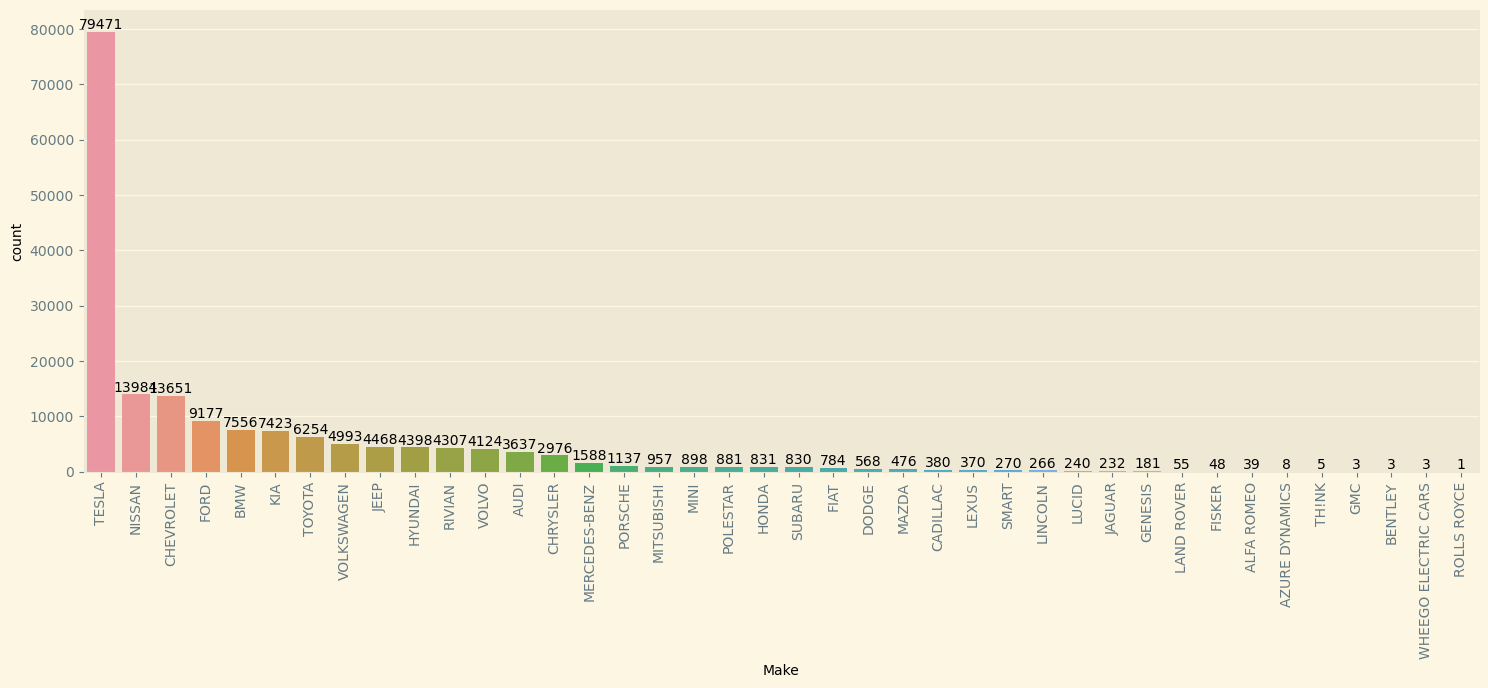

In [24]:
plt.figure(figsize=(18,6))

sns.countplot(data=df, x='Make', order=df['Make'].value_counts().index)
plt.xticks(rotation=90)
ax = plt.gca()
add_bar_labels(ax)
plt.show()

In [25]:
top_Manufacturer = df[ (df['Make'] == 'TESLA') |
                                        (df['Make'] == 'NISSAN') |
                                        (df['Make'] == 'CHEVROLET') |
                                        (df['Make'] == 'FORD') |
                                        (df['Make'] == 'BMW') |
                                        (df['Make'] == 'KIA') |
                                        (df['Make'] == 'TOYOTA') |
                                        (df['Make'] == 'VOLKSWAGEN') |
                                        (df['Make'] == 'JEEP') |
                                        (df['Make'] == 'HYUNDAI')]

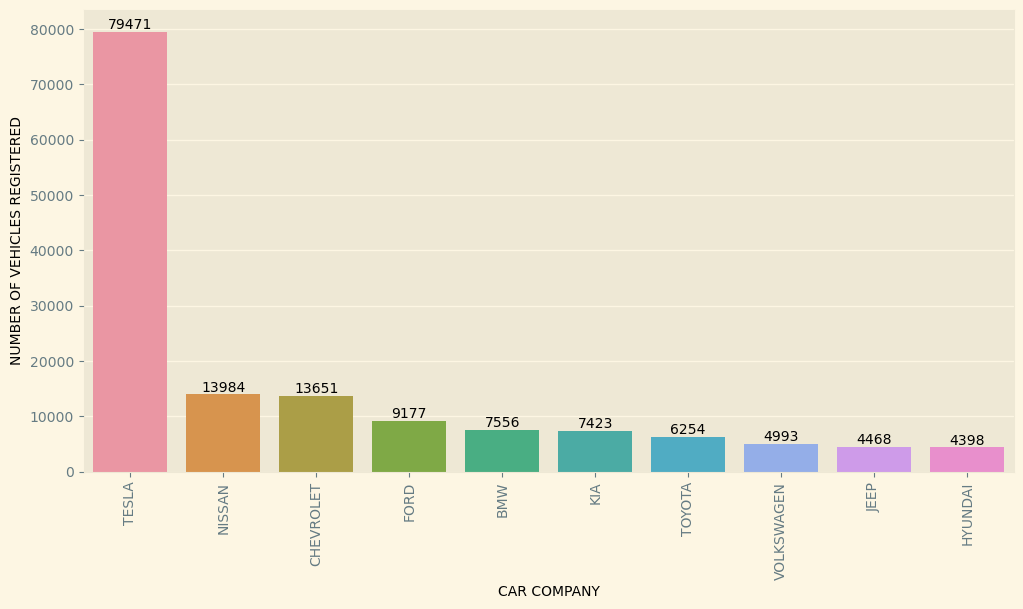

In [26]:
plt.figure(figsize=(12,6))

sns.countplot(data=top_Manufacturer, x='Make', order=top_Manufacturer['Make'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel("CAR COMPANY")
plt.ylabel("NUMBER OF VEHICLES REGISTERED")
ax = plt.gca()
add_bar_labels(ax)
plt.show()

CONCLUSION :-
    
    From this we get to know that,
    1.Tesla has the maximum number of registered vehicles, which is more than three times that of the second-highest manufacturer.
    2.NISSAN is the second most popular manufacturer, followed by CHEVROLET, though both have significantly fewer registrations than TESLA.
    3.FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP, and HYUNDAI has moderate number of registered vehicles

                                                                        
 ## <span style="color: purple;">Now we will analyse top 10 models amount this 10 manufacturer</span>


In [28]:
top_Manufacturer['Model'].value_counts().head(10)

MODEL Y           35921
MODEL 3           30009
LEAF              13352
MODEL S            7711
BOLT EV            6811
MODEL X            5784
VOLT               4782
ID.4               3928
WRANGLER           3382
MUSTANG MACH-E     3316
Name: Model, dtype: int64

In [29]:
top_Manufacturer_model = top_Manufacturer[ (top_Manufacturer['Model'] == 'MODEL Y') |
                                        (top_Manufacturer['Model'] == 'MODEL 3') |
                                        (top_Manufacturer['Model'] == 'LEAF') |
                                        (top_Manufacturer['Model'] == 'MODEL S') |
                                        (top_Manufacturer['Model'] == 'BOLT EV') |
                                        (top_Manufacturer['Model'] == 'MODEL X') |
                                        (top_Manufacturer['Model'] == 'VOLT') |
                                        (top_Manufacturer['Model'] == 'ID.4') |
                                        (top_Manufacturer['Model'] == 'WRANGLER') |
                                        (top_Manufacturer['Model'] == 'MUSTANG MACH-E')]

In [30]:
top_Manufacturer_model['Model'].unique()

array(['MODEL Y', 'MODEL S', 'LEAF', 'BOLT EV', 'MODEL 3', 'WRANGLER',
       'MODEL X', 'VOLT', 'MUSTANG MACH-E', 'ID.4'], dtype=object)

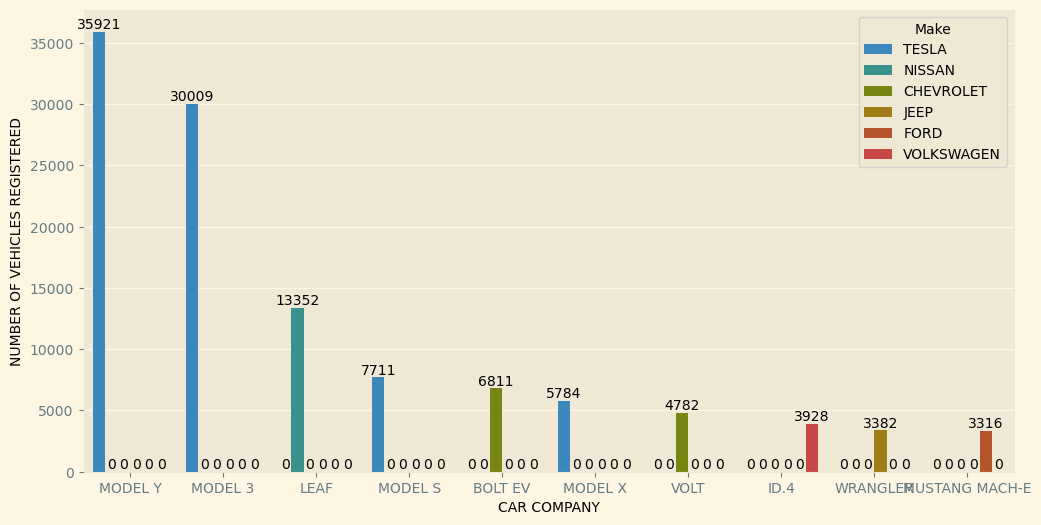

In [31]:
plt.figure(figsize=(12,6))

sns.countplot(data=top_Manufacturer_model, x='Model', order=top_Manufacturer_model['Model'].value_counts().index, hue = 'Make')
plt.xlabel("CAR COMPANY")
plt.ylabel("NUMBER OF VEHICLES REGISTERED")
ax = plt.gca()
add_bar_labels(ax)
plt.show()

    In this visual we have tried to visualize top 10 model from top 10 manufacturer

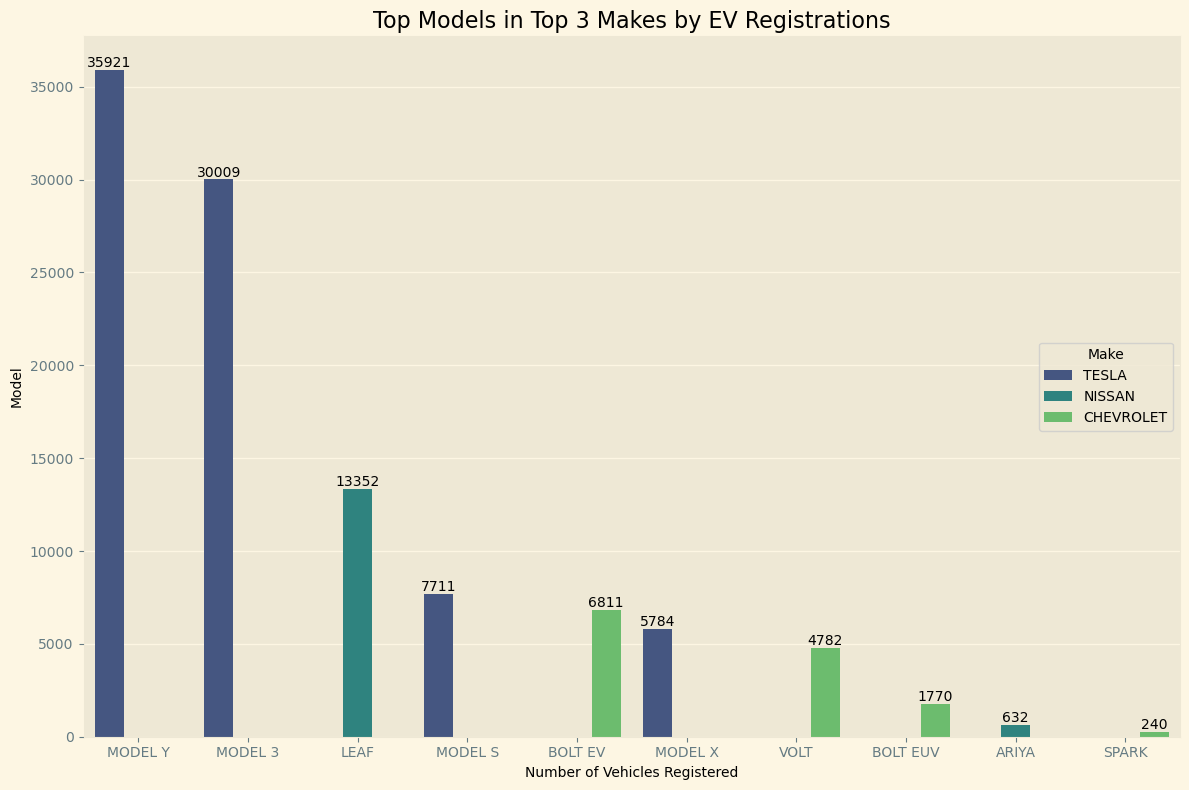

In [32]:
ev_make_distribution = df['Make'].value_counts().head(10) 

top_3_makes = ev_make_distribution.head(3).index
top_makes_data = df[df['Make'].isin(top_3_makes)]

ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8))
ax = sns.barplot(y='Number of Vehicles', x='Model', hue='Make', data=top_models, palette="viridis")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

    In this visual we have tried to visualize top 3 model from top 10 manufacturer

CONCLUSION :-
      
      The above graph shows the distribution of electric vehicle registrations among different models from the top three manufacturers: TESLA, NISSAN, and CHEVROLET. Here are the findings:

    - TESLA’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations.
    - NISSAN’s LEAF is the third most registered model and the most registered non-TESLA vehicle.
    - TESLA’s MODEL S and MODEL X also have a significant number of registrations.
    - CHEVROLET’s BOLT EV and VOLT are the next in the ranking with considerable registrations, followed by BOLT EUV.
    - NISSAN’s ARIYA and CHEVROLET’s SPARK have the least number of registrations among the models shown.

                                                                        
 ## <span style="color: purple;">Now we will analyze electric range of the vehicle</span>


In [33]:
df['Electric Range'].unique()

array([291,   0, 270, 210,  21,  75,  29,  84,  30, 126,  18, 107, 322,
       220,  72,  19,  26,  73, 151, 222,  93,  14, 150,  58, 266, 215,
        32, 239,  83,  25, 249, 103, 258,  17, 238,  87, 149,  42,  68,
       170, 125,  38,  13, 289,  53,  20, 204,  82,  33, 200,  47, 259,
        35,  16,  22,  37, 208, 308,  34,   6,  48,  39, 234,  10,  62,
       192, 218, 330, 110,  15,  23, 203,  81,  76,  41, 233, 293,  31,
       153, 111, 265,  97,   8,  40,  12, 100, 114, 124,  28, 337,  59,
       245,   9,  24,  27,  95,  11,  36,  56,  57,  51,  74], dtype=int64)

Text(70, 0.075, 'MEAN: 58.83')

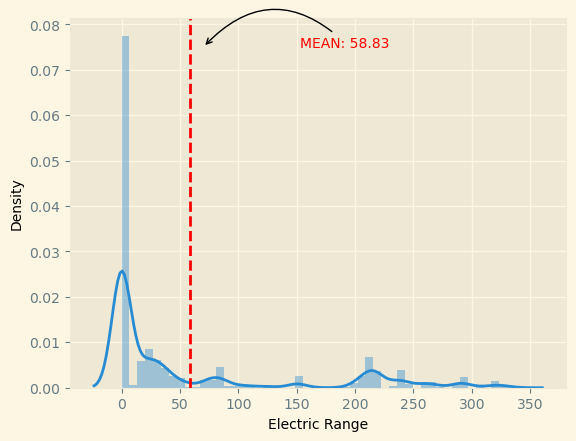

In [34]:
sns.distplot(df['Electric Range'])
m = df['Electric Range'].mean()
plt.axvline(df['Electric Range'].mean(), color='red', linestyle='--')
plt.annotate(f'MEAN: {m:.2f}',xy=(70,0.075), xytext=(70,0.075),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'),color = 'red')

In [35]:
df[df['Electric Range'] == 0]['Make'].unique()

array(['TESLA', 'CHEVROLET', 'KIA', 'RIVIAN', 'FORD', 'VOLKSWAGEN',
       'VOLVO', 'MERCEDES-BENZ', 'SUBARU', 'BMW', 'AUDI', 'HYUNDAI',
       'POLESTAR', 'PORSCHE', 'MINI', 'NISSAN', 'LUCID', 'TOYOTA',
       'CADILLAC', 'FISKER', 'JAGUAR', 'LEXUS', 'GENESIS', 'GMC', 'MAZDA',
       'ROLLS ROYCE'], dtype=object)

    but my personal opinion is that any vehicle cannot have a range of 0. So there could be some errors in this particular column.

##### CONCLUSION :-
    
    From the above visualization we get that ,
        1.maximum data is concentrated below mean.
        2. The distribution is skrewed toward right, with a long tail extending towards higher ranges, although the number of vehicles with higher ranges is much less frequent.

                                                                        
 ## <span style="color: purple;">Now we will analyze Electric range with model year so from that we can get how the technology is growing in this sector</span>



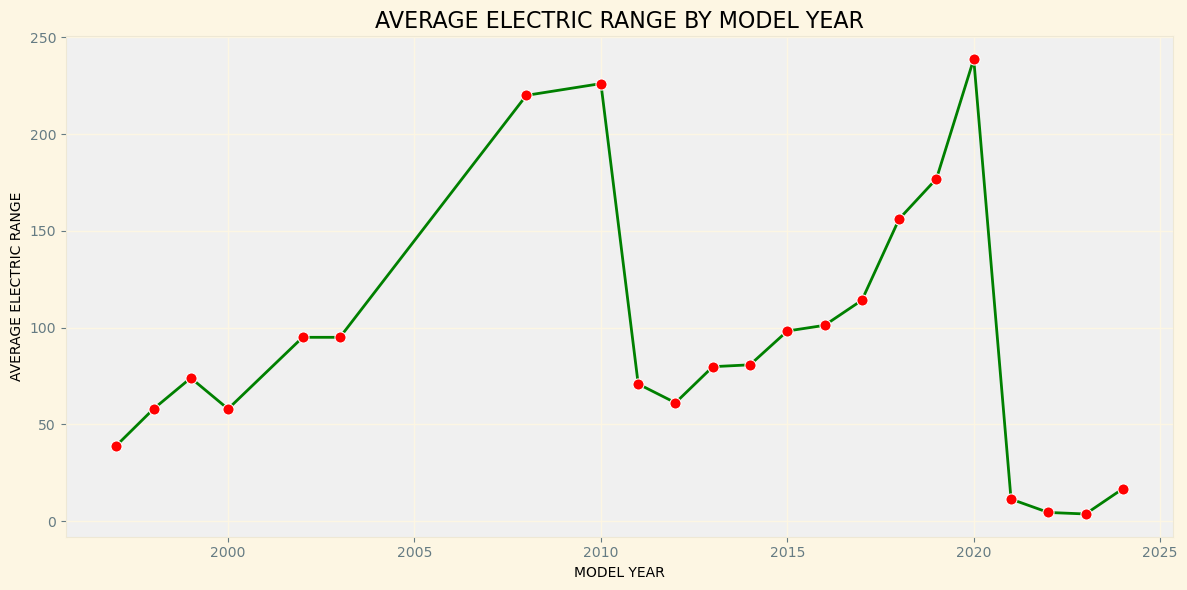

In [47]:
# calculating the average electric range by model year
average_range_by_year = df.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green'
                                             , markersize=8, markerfacecolor='red')
plt.title('AVERAGE ELECTRIC RANGE BY MODEL YEAR')
plt.xlabel('MODEL YEAR')
plt.ylabel('AVERAGE ELECTRIC RANGE')
plt.gca().set_facecolor('#f0f0f0')


plt.tight_layout()
plt.show()

##### CONCLUSION:-

    The above graph shows the progression of the average electric range of vehicles from around the year 2000 to 2024.
    1. There is a general upward trend in the average electric range of EVs over the years, indicating improvements in technology and                 battery efficiency.
    2. There is a noticeable peak around the year 2020 when the average range reaches its highest point.
    3. Following 2020, there’s a significant drop in the average range, which could indicate that data for the following years might be                 incomplete.

                                                                        
 ## <span style="color: purple;">Now we will analyze Average electric range by model</span>


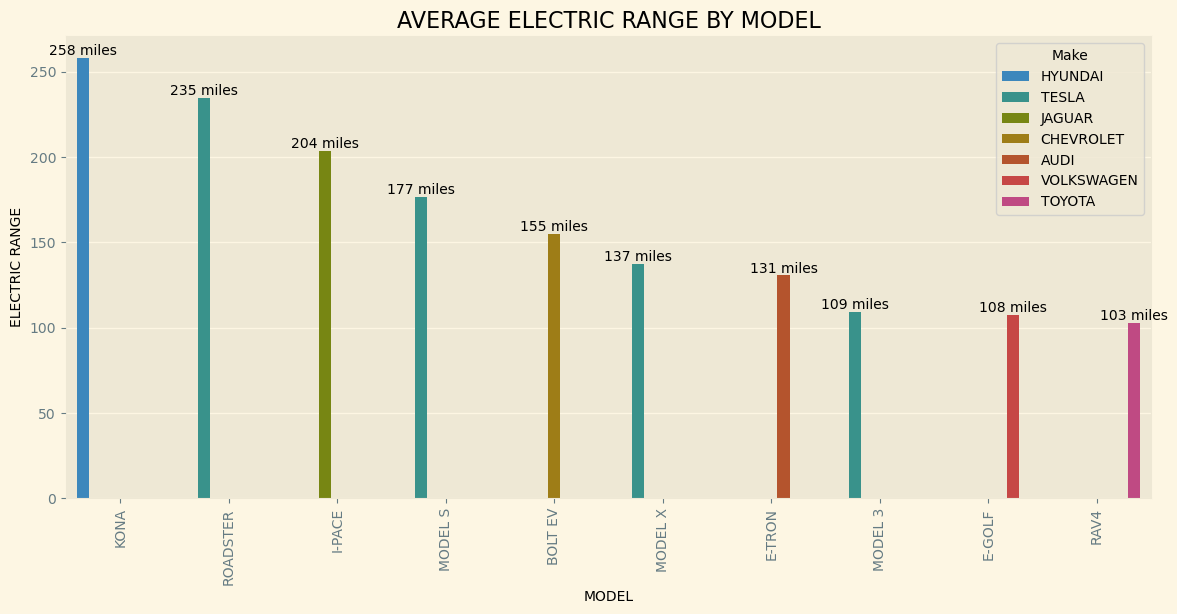

In [64]:
average_range_by_model = df.groupby(['Make','Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

top_range_models = average_range_by_model.head(10)
plt.figure(figsize=(14,6))
ax = sns.barplot(y='Electric Range', x='Model', hue='Make', data=top_range_models)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f} miles', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xticks(rotation = 90)
plt.title('AVERAGE ELECTRIC RANGE BY MODEL')
plt.xlabel("MODEL")
plt.ylabel("ELECTRIC RANGE")
plt.show()

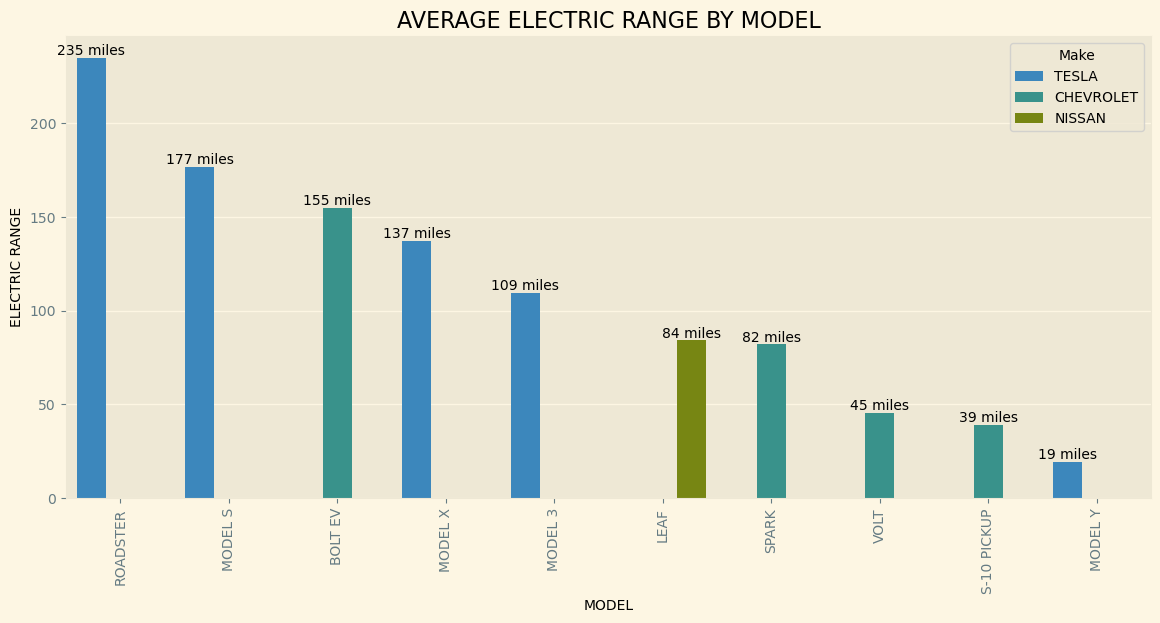

In [65]:
average_range_by_model = top_makes_data.groupby(['Make','Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

top_range_models = average_range_by_model.head(10)
plt.figure(figsize=(14,6))
ax = sns.barplot(y='Electric Range', x='Model', hue='Make', data=top_range_models)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f} miles', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xticks(rotation = 90)
plt.title('AVERAGE ELECTRIC RANGE BY MODEL')
plt.xlabel("MODEL")
plt.ylabel("ELECTRIC RANGE")
plt.show()

##### Conclusion:- 
   
    - The TESLA ROADSTER has the highest average electric range among the models listed.
    -TESLA’s models (ROADSTER, MODEL S, MODEL X, and MODEL 3) occupy the majority of the top positions, indicating that on average, TESLA’s vehicles have higher electric ranges.
    -The CHEVROLET BOLT EV is an outlier among the CHEVROLET models, having a substantially higher range than the VOLT and S-10 PICKUP from the same maker.
    -NISSAN’s LEAF and CHEVROLET’s SPARK are in the lower half of the chart, suggesting more modest average ranges.

                                                                        
 ## <span style="color: purple;">NOW WE WILL TRAIN OUR MODEL</span>



In [71]:
# calculate the number of EVs registered each year
ev_registration_counts = df['Model Year'].value_counts().sort_index()
ev_registration_counts

1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: Model Year, dtype: int64

In [72]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


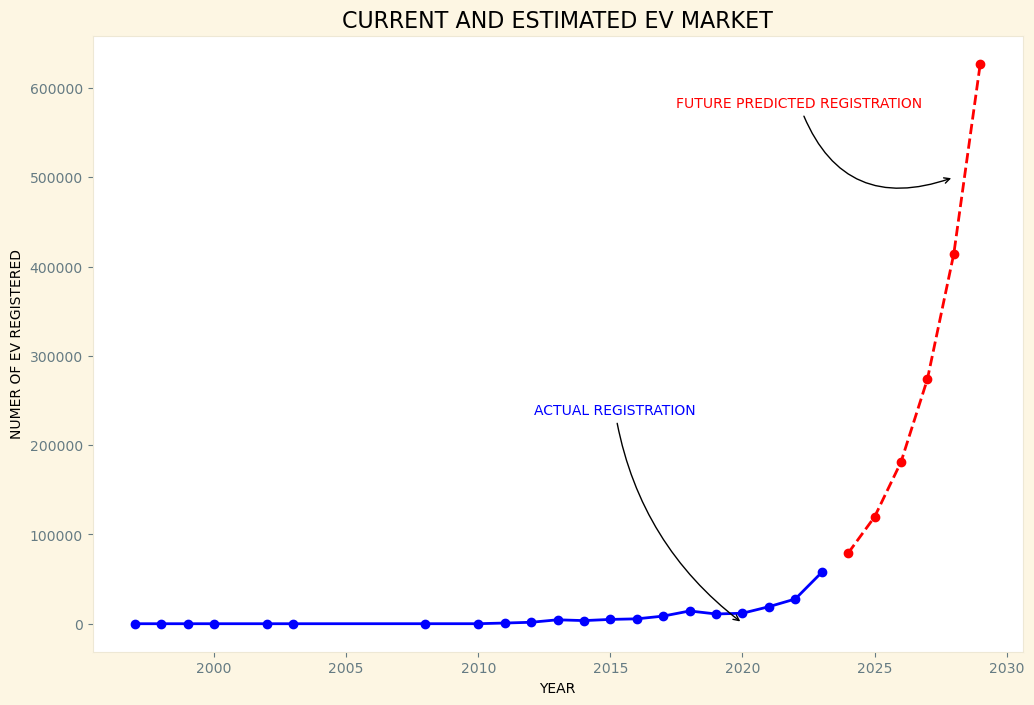

In [109]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.annotate('FUTURE PREDICTED REGISTRATION',xy=(2028,500000), xytext=(-200,50),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'),color = 'red')

plt.annotate('ACTUAL REGISTRATION',xy=(2020,650), xytext=(-150,150),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'),color = 'BLUE')

plt.title('CURRENT AND ESTIMATED EV MARKET')
plt.xlabel('YEAR')
plt.ylabel('NUMER OF EV REGISTERED')
plt.grid(False)
plt.gca().set_facecolor('white')


plt.show()